# Project Title: Ethereum Fraud Detection Using Machine Learning Approach

## Group 12

| Name | Matrix No. |
| ----------- | ----------- |
| Liew Yao Qin | 22110206 |
| Leem Siew Juan | S2123470 |
| Huang Kee Ming | 22116760 |
| Zhang Xuan    |22091244  |
| Duan Yang Qi | 22098783  |


# Introduction

1.Problem statement

Cryptocurrency platforms are popular for providing secure and fast banking transaction services. These transactions are not limited to sending or receiving funds through blockchain platforms, smart contracts and cryptocurrency transactions are also common. Ethereum, after Bitcoin, is the second most popular cryptocurrency platform, processing over a million transactions per day. However, like other cryptocurrency platforms, Ethereum is not immune to online fraud.

Although the transaction process in the blockchain is known for its robustness and security, every time a certain entity in the network submits a new transaction, all entities execute the consensus algorithm. Once the validity of a transaction is confirmed by the consensus algorithm, the block is added to the distributed ledger in cryptographic form. But even with such internal security mechanisms, illegal activities such as fraud, money laundering, Ponzi schemes, bribery, and phishing still occur frequently on Ethereum. This poses a serious threat to the financial security of the Ethereum network. In order to create a healthy financial environment, Ethereum system governance urgently needs methods to automatically detect and identify Ethereum fraud

2.objectives

a) By applying machine learning methods, build a model that can automatically identify and analyze suspicious accounts and transaction behaviors on Ethereum. By collecting and analyzing a large amount of Ethereum transaction data, such as transaction time intervals, transaction amounts, contract creation activities and other characteristics, a machine learning model that can accurately detect is trained.

b) Improve the robustness and interpretability of the system. Fraud is often complex and difficult to identify, and detection systems need to be able to cope with various forms of fraud and maintain stable performance. At the same time, the system should also provide visual results to help users understand the detection results and the reasons behind them.

c) Explore the application effects of different machine learning algorithms in Ethereum fraud detection, compare the advantages and disadvantages of various algorithms, and optimize the parameters and structure of the model to improve the accuracy and efficiency of detection.


In [ ]:
# !pip install --upgrade scikit-learn
!pip install umap-learn
!pip install optuna

#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score
import time


# Training & classification imports
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


# Tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


#XGBoost imports
import xgboost as xgb
from xgboost import XGBClassifier


#LightBGM imports
from lightgbm import LGBMClassifier, early_stopping


#Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import optuna


#AdaBoost imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#Keras NN imports
!pip install keras-tuner --upgrade

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


#Initializers
#Constants
FOLD_NUMBER = 10
RANDOM_STATE = 23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 925.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


<ipython-input-1-6c5f98919f90>:66: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
# file_path = '/content/drive/MyDrive/eth_illicit_features.csv'
file_path = '/content/eth_illicit_features.csv'
df = pd.read_csv(file_path)
# df.head()
print(df)

                                          address  flag  \
0      0xd0cc2b24980cbcca47ef755da88b220a82291407     1   
1      0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1     1   
2      0x00e01a648ff41346cdeb873182383333d2184dd1     1   
3      0x858457daa7e087ad74cdeeceab8419079bc2ca03     1   
4      0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d     1   
...                                           ...   ...   
12141  0x38e404b6ca4549988ced1d065330f1f722787924     0   
12142  0x8f40dac94ac52f90218d9aa5e605fe39dabe3979     0   
12143  0xb92027b6adee9f63290a5a1bd9d15d6a163f4012     0   
12144  0x0cd3724542af4be8243eba3f560c0c55c5abd1df     0   
12145  0x53d5d85e9a67fc0178a5216fdedde4050a82693e     0   

       minTimeBetweenSentTnx  maxTimeBetweenSentTnx  avgTimeBetweenSentTnx  \
0                        0.0              2387389.0           5.807655e+04   
1                        0.0                    0.0           0.000000e+00   
2                       37.0             25112882.0      

In [ ]:
print("Row: ", df.shape[0])
print("Columns: ", df.shape[1])
print(df.shape)
df.head()

Row:  12146
Columns:  34
(12146, 34)


,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


There are 12146 observation and 33 attributes.

## Dataset Information

In [ ]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
address,object,12146,0
flag,int64,2,0
minTimeBetweenSentTnx,float64,1704,0
maxTimeBetweenSentTnx,float64,8094,0
avgTimeBetweenSentTnx,float64,8210,0
minTimeBetweenRecTnx,float64,3443,0
maxTimeBetweenRecTnx,float64,10049,0
avgTimeBetweenRecTnx,float64,10236,0
lifetime,int64,1191,0
sentTransactions,int64,1380,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12146 entries, 0 to 12145
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  12146 non-null  object 
 1   flag                     12146 non-null  int64  
 2   minTimeBetweenSentTnx    12146 non-null  float64
 3   maxTimeBetweenSentTnx    12146 non-null  float64
 4   avgTimeBetweenSentTnx    12146 non-null  float64
 5   minTimeBetweenRecTnx     12146 non-null  float64
 6   maxTimeBetweenRecTnx     12146 non-null  float64
 7   avgTimeBetweenRecTnx     12146 non-null  float64
 8   lifetime                 12146 non-null  int64  
 9   sentTransactions         12146 non-null  int64  
 10  receivedTransactions     12146 non-null  int64  
 11  createdContracts         12146 non-null  int64  
 12  numUniqSentAddress       12146 non-null  int64  
 13  numUniqRecAddress        12146 non-null  int64  
 14  minValSent            

## Data Preprocessing

In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               flag  minTimeBetweenSentTnx  maxTimeBetweenSentTnx  \
count  12146.000000           1.214600e+04           1.214600e+04   
mean       0.424008           2.649065e+04           4.270947e+07   
std        0.494212           7.167752e+05           2.510061e+08   
min        0.000000           0.000000e+00           0.000000e+00   
25%        0.000000           0.000000e+00           0.000000e+00   
50%        0.000000           0.000000e+00           2.042395e+05   
75%        1.000000           8.000000e+01           1.845179e+06   
max        1.000000           6.198813e+07           1.658260e+09   

       avgTimeBetweenSentTnx  minTimeBetweenRecTnx  maxTimeBetweenRecTnx  \
count           1.214600e+04          1.214600e+04          1.214600e+04   
mean            3.648564e+06          2.499426e+05          1.162226e+09   
std             4.121296e+07          3.403948e+06          7.159138e+08   
min             0.000000e+00          0.000000e+00   

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


# Calculate Z-Score for each numerical feature
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Define threshold for outlier detection (absolute Z-Score > 3)
threshold = 3

# Find outliers
outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]

# Display the outliers
print("Outliers:")
print(outliers)

# Remove outliers
df_no_outliers = df[(np.abs(z_scores) <= threshold).all(axis=1)]

# Display the dataframe without outliers
print("DataFrame without outliers:")
print(df_no_outliers)

# Update the original dataframe
df = df_no_outliers


Outliers:
                                          address  flag  \
18     0xf9fe85e19bd533c69067c6e2ff02727d40a54100     1   
27     0x3b0009071a0a9983e9aab537fd8c9ad478310aeb     1   
32     0xf902aa3a62f9e28878129e1a8f1eb71e4fd7a88c     1   
36     0x6fcf42fcd9c6a54b64d1b52083700142952a2805     1   
103    0x85704b506e10b10d714ead28cde947baa58f0ea4     1   
...                                           ...   ...   
12132  0x7d0e63736aeb136acd44c70d6e1a0f27fb897679     0   
12133  0x8bc1e2e9cf5dab703f8252473cbbdaef83843f95     0   
12134  0x24deaa595e5b3f2fe54636de4b05adfc515d334d     0   
12135  0x1a35f75f3a892e2c54b68039465a7fa8023e0b4f     0   
12139  0x3b3c2dacfdd7b620c8916a5f7aa6476bdfb1aa07     0   

       minTimeBetweenSentTnx  maxTimeBetweenSentTnx  avgTimeBetweenSentTnx  \
18                       0.0                    0.0           0.000000e+00   
27                       0.0                    0.0           0.000000e+00   
32                      57.0              10941

In [ ]:
df.isnull().sum()

address                    0
flag                       0
minTimeBetweenSentTnx      0
maxTimeBetweenSentTnx      0
avgTimeBetweenSentTnx      0
minTimeBetweenRecTnx       0
maxTimeBetweenRecTnx       0
avgTimeBetweenRecTnx       0
lifetime                   0
sentTransactions           0
receivedTransactions       0
createdContracts           0
numUniqSentAddress         0
numUniqRecAddress          0
minValSent                 0
maxValSent                 0
avgValSent                 0
minValReceived             0
maxValReceived             0
avgValReceived             0
totalTransactions          0
totalEtherSent             0
totalEtherReceived         0
totalEtherSentContracts    0
totalEtherBalance          0
activityDays               0
dailyMax                   0
ratioRecSent               0
ratioSentTotal             0
ratioRecTotal              0
giniSent                   0
giniRec                    0
txFreq                     0
stdBalanceEth              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

flag
0    5398
1    4899
Name: count, dtype: int64


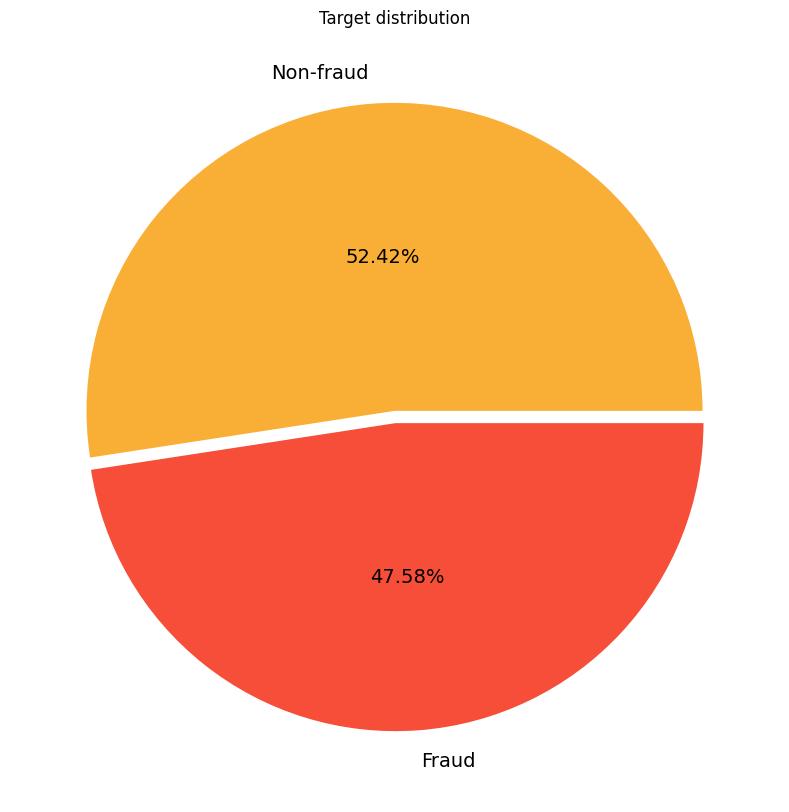

In [ ]:
# Inspect target distribution
print(df['flag'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['flag'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

In [ ]:
import pandas as pd

# Calculate the frequency of each class in the target variable
class_counts = df['flag'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_counts)

# Check if the dataset is balanced
if class_counts.max() / class_counts.min() > 1.5:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

Class Distribution:
flag
0    5398
1    4899
Name: count, dtype: int64
The dataset is balanced.



Correlation matrix:


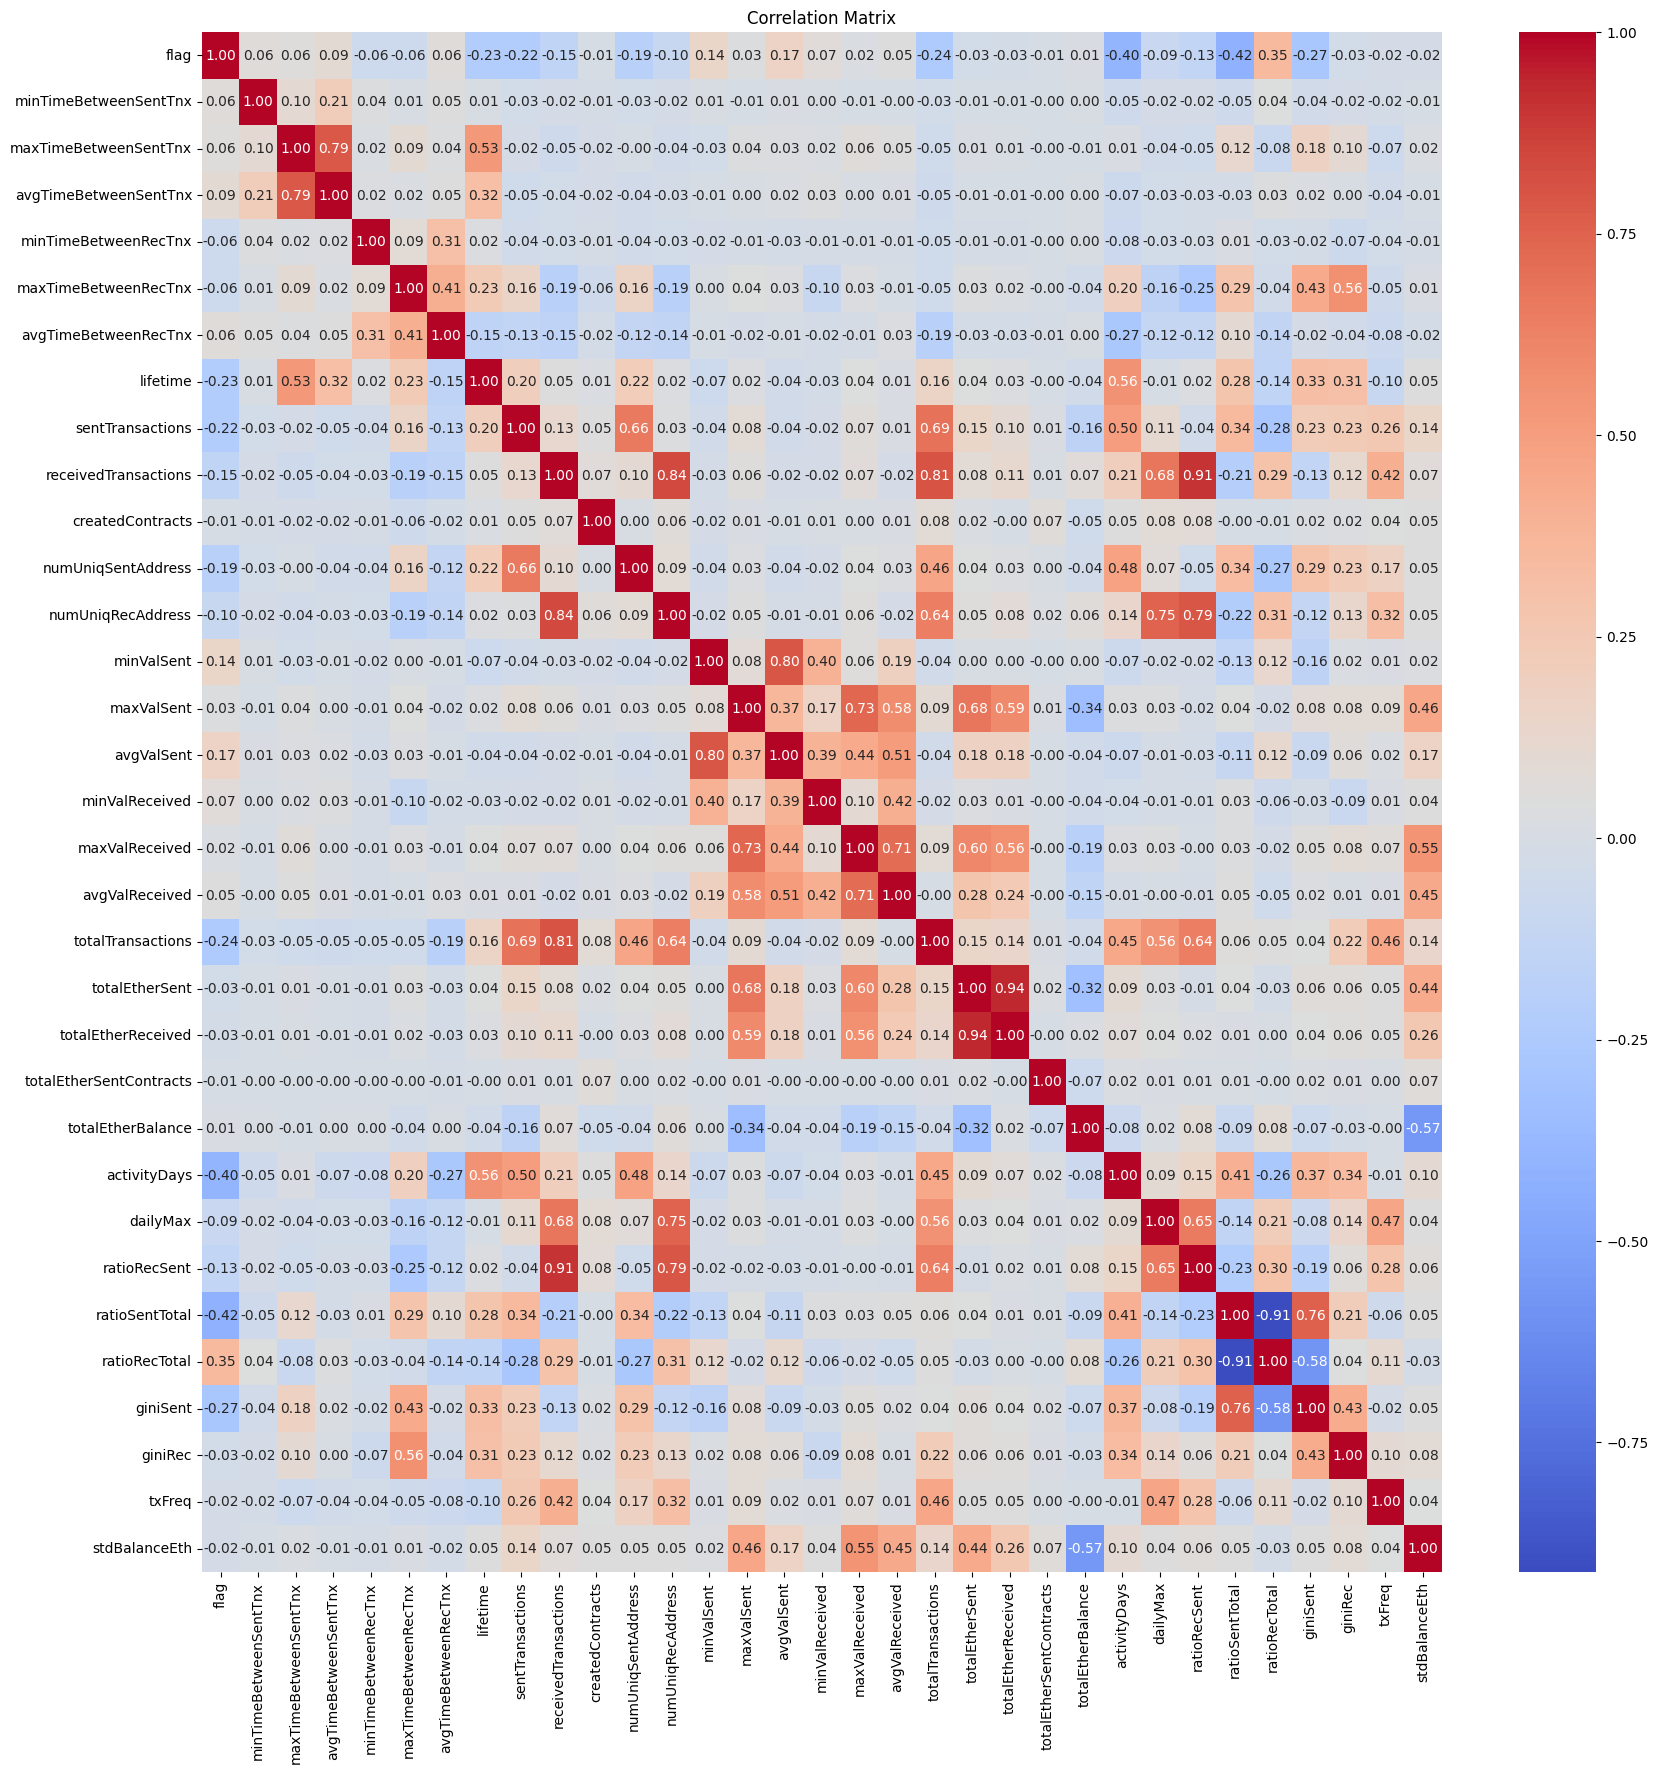

In [ ]:
# Filter out non-numeric columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
print("\nCorrelation matrix:")
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

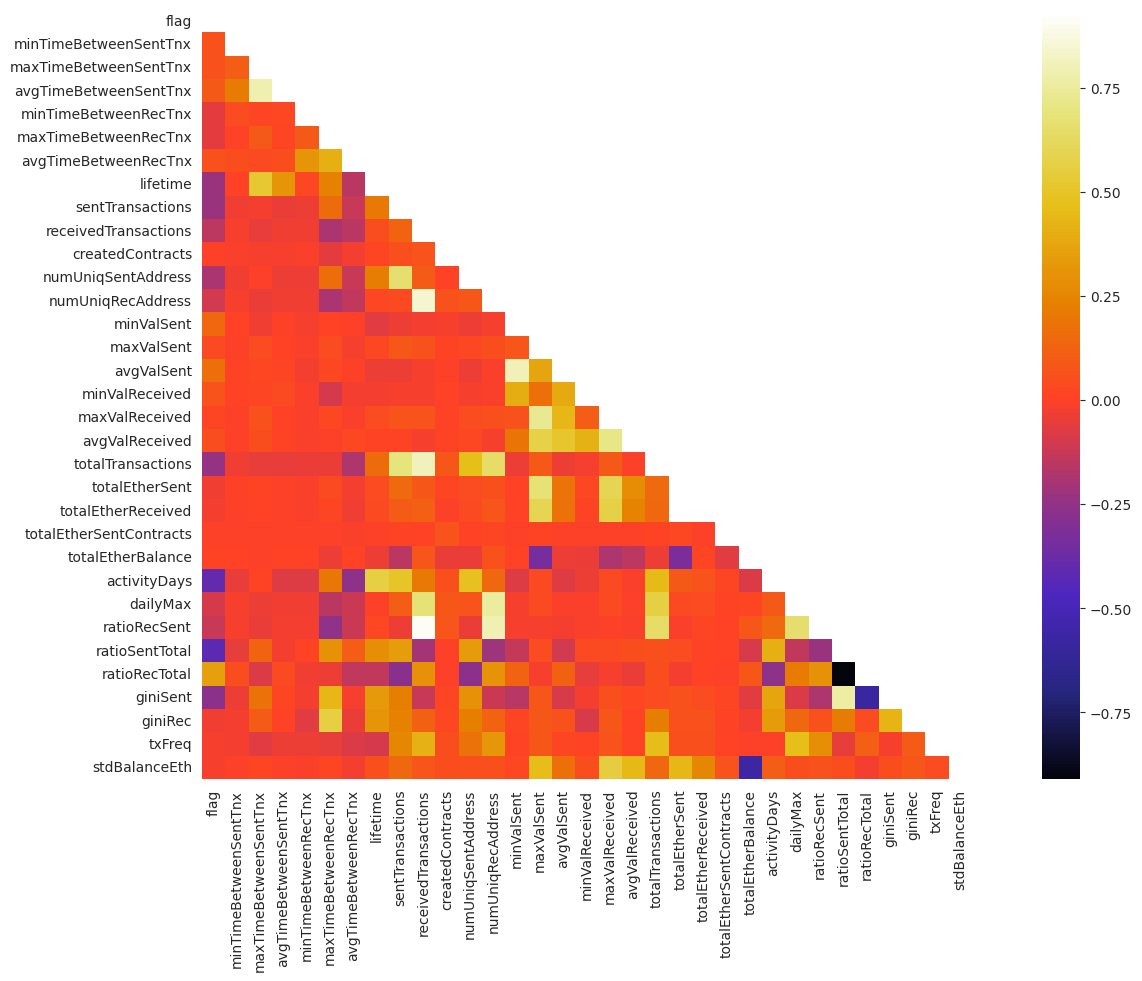

In [ ]:
# Correlation matrix

# TO STUDY: We are to study which features to be dropped due to high correlation ??
df.drop('address', axis=1, inplace=True)
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

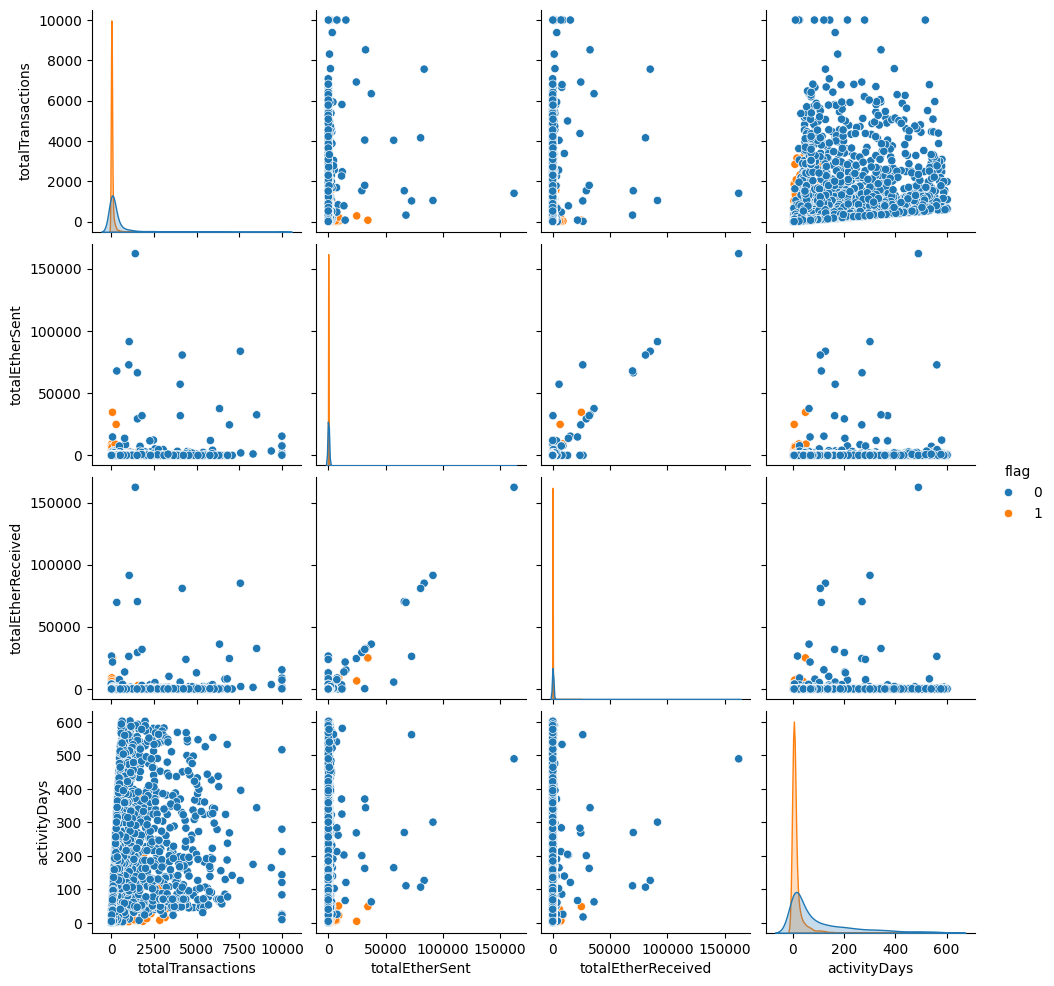

In [ ]:
# #Pairplot
# sns.pairplot(df, hue='flag', vars=['totalTransactions', 'totalEtherSent', 'totalEtherReceived', 'activityDays'])
# plt.show()

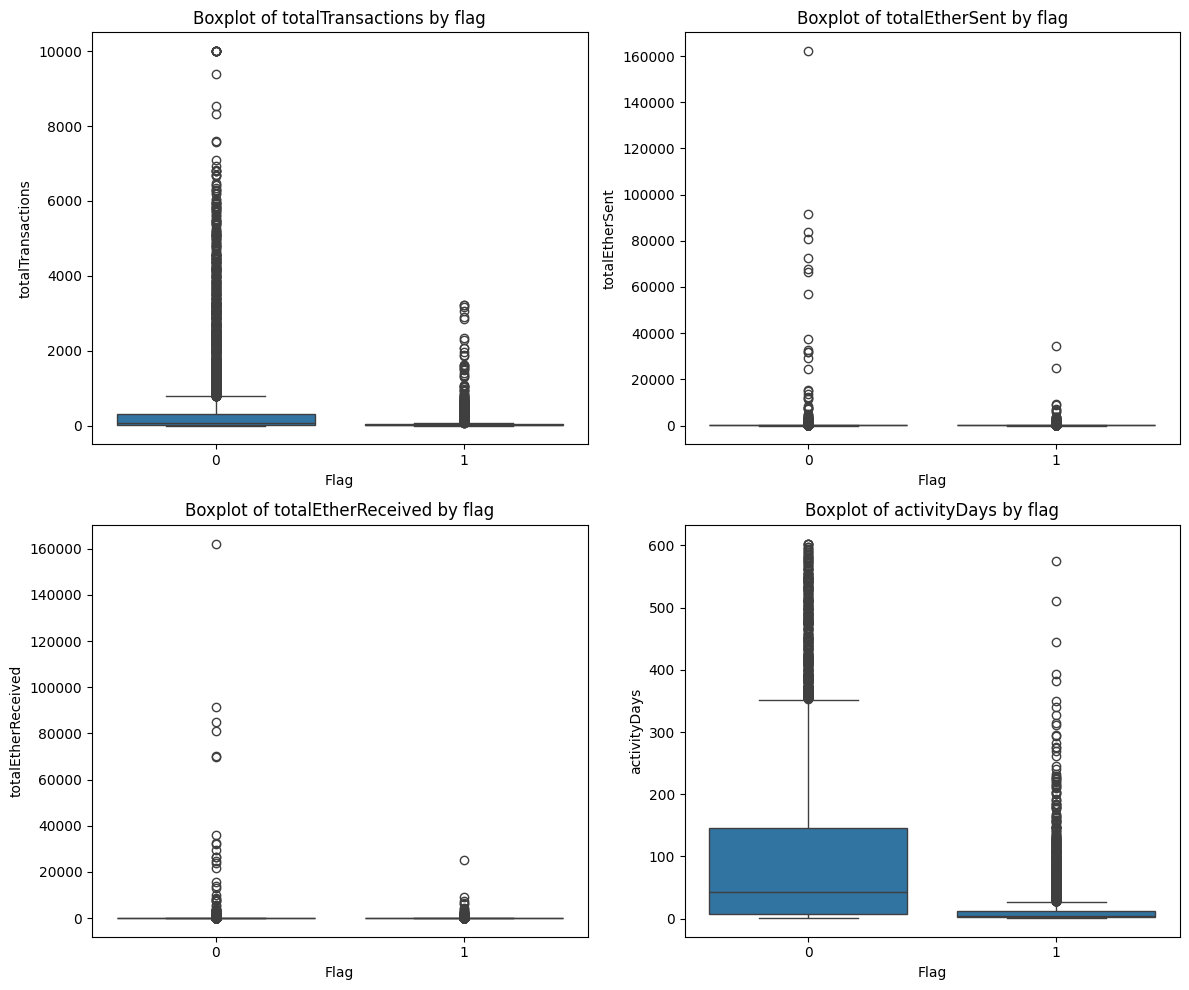

In [ ]:
# # Select the variables of interest
# variables_of_interest = ['totalTransactions', 'totalEtherSent', 'totalEtherReceived', 'activityDays']

# # Create a 2x2 grid of subplots for the boxplots
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot each variable as a boxplot
# for i, variable in enumerate(variables_of_interest):
#     sns.boxplot(x='flag', y=variable, data=df, ax=axes[i])
#     axes[i].set_title(f'Boxplot of {variable} by flag')
#     axes[i].set_xlabel('Flag')
#     axes[i].set_ylabel(variable)

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

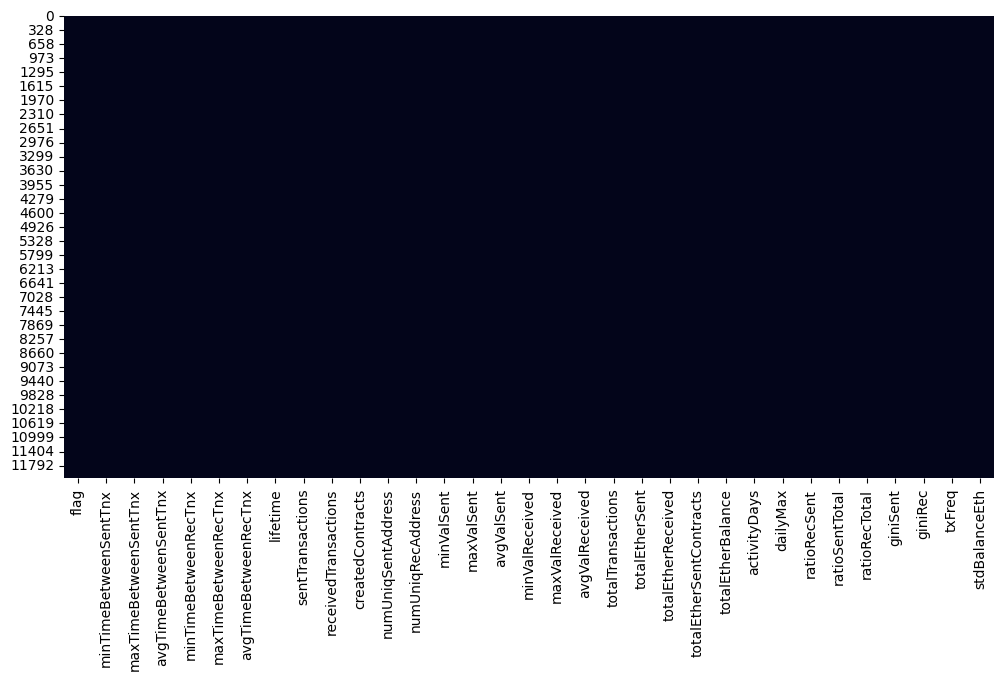

In [ ]:
# Visualize missings pattern of the dataframe
# TO NOTE: If it is pitch black, means no missing value
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Data Modelling

In [ ]:
#===========================================================================================

In [ ]:
# Sampling data
positive_sample = df[df["flag"] == 1]
# negative_sample = df[df["flag"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
negative_sample = df[df["flag"] == 0]

data = pd.concat([negative_sample, positive_sample], axis = 0)

y = data["flag"]  #FLAG: whether the transaction is fraud or not

X = data.iloc[:,1:]  #select all rows (:) and all columns starting from the third column (index 2)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10297 entries, 5150 to 5149
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   minTimeBetweenSentTnx    10297 non-null  float64
 1   maxTimeBetweenSentTnx    10297 non-null  float64
 2   avgTimeBetweenSentTnx    10297 non-null  float64
 3   minTimeBetweenRecTnx     10297 non-null  float64
 4   maxTimeBetweenRecTnx     10297 non-null  float64
 5   avgTimeBetweenRecTnx     10297 non-null  float64
 6   lifetime                 10297 non-null  int64  
 7   sentTransactions         10297 non-null  int64  
 8   receivedTransactions     10297 non-null  int64  
 9   createdContracts         10297 non-null  int64  
 10  numUniqSentAddress       10297 non-null  int64  
 11  numUniqRecAddress        10297 non-null  int64  
 12  minValSent               10297 non-null  float64
 13  maxValSent               10297 non-null  float64
 14  avgValSent               

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 10297 entries, 5150 to 5149
Series name: flag
Non-Null Count  Dtype
--------------  -----
10297 non-null  int64
dtypes: int64(1)
memory usage: 160.9 KB


In [ ]:
#Dimensionality reduction.  Using PCA
#=====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_optimal = PCA(n_components=0.95)  # Choose the number of components to explain 95% of variance
X_pca = pca_optimal.fit_transform(X_scaled)
df_X_pca = pd.DataFrame(X_pca)

print("X: ", X)
print("PCA data frame: ")
print(df_X_pca)

#============================================
print("df_X_DR:")
X_DR = X_pca
df_X_DR = pd.DataFrame(X_DR)
print(df_X_DR.head())

X:        minTimeBetweenSentTnx  maxTimeBetweenSentTnx  avgTimeBetweenSentTnx  \
5150                    0.0                77410.0            2814.508617   
5153                    8.0                  189.0              72.857143   
5155                   20.0                  201.0             113.384615   
5160                    0.0                    0.0               0.000000   
5161                    0.0                    0.0               0.000000   
...                     ...                    ...                    ...   
5145                    0.0                    0.0               0.000000   
5146                    0.0              6191083.0           48292.978261   
5147                    0.0                    0.0               0.000000   
5148                    0.0               869484.0           30010.800000   
5149                    0.0                    0.0               0.000000   

      minTimeBetweenRecTnx  maxTimeBetweenRecTnx  avgTimeBetweenRecTnx 

In [ ]:
##Keras NN Part 1 (AUTO TUNING)

#===========================================================
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_DR, y, test_size=0.2, random_state=42)

start_time = time.time()

# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                    input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=10,
    directory='tuner_results',
    project_name='keras_tuner_20240520_2059'
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=100,
             batch_size=32,
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=10)[0]

print("best_hp: ", best_hp)

# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hp)

end_time = time.time()
print(f"Processing time of Keras NN Param Search: {end_time - start_time} seconds")

#===========================================================

NameError: name 'train_test_split' is not defined

In [ ]:
print("best_hp.values: ",best_hp.values)
#best_hp.values:  {'units1': 384, 'dropout1': 0.2, 'units2': 256, 'dropout2': 0.4, 'learning_rate': 0.001}

NameError: name 'best_hp' is not defined

In [ ]:
##Keras NN Part 2(a)

final_model.summary()

NameError: name 'final_model' is not defined

In [ ]:
##Keras NN Part 2(b)

#best_hp.values:  {'units1': 384, 'dropout1': 0.2, 'units2': 256, 'dropout2': 0.4, 'learning_rate': 0.001}
final_model = Sequential()
final_model.add(Dense(units=384,
                input_dim=df_X_DR.shape[1], activation='relu'))
final_model.add(Dropout(rate=0.2))
final_model.add(Dense(units=256, activation='relu'))
final_model.add(Dropout(rate=0.4))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384)               8064      
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               98560     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 106881 (417.50 KB)
Trainable params: 106881 (417.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
232/232 [==============================] - 3s 7ms/step - loss: 0.4179 - accuracy: 0.8079 - val_loss: 0.8018 - val_accuracy: 0.6677
Epoch 2/100
232/232 [==============================] - 3s 13ms/step - loss: 0.3483 - accuracy: 0.8424 - val_loss: 0.7562 - val_accuracy: 0.6629
Epoch 3/100
232/232 [==============================] - 3s 13ms/step - loss: 0.3289 - accuracy: 0.8516 - val_loss: 0.6416 - val_accuracy: 0.7044
Epoch 4/100
232/232 [==============================] - 2s 11ms/step - loss: 0.3160 - accuracy: 0.8585 - val_loss: 0.9347 - val_accuracy: 0.5572
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 0.2961 - accuracy: 0.8682 - val_loss: 0.9406 - val_accuracy: 0.5847
Epoch 6/100
232/232 [==============================] - 1s 5ms/step - loss: 0.2868 - accuracy: 0.8760 - val_loss: 0.8859 - val_accuracy: 0.6699
Epoch 7/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2772 - accuracy: 0.8798 - val_loss: 0.8712 - val_accuracy: 0.6

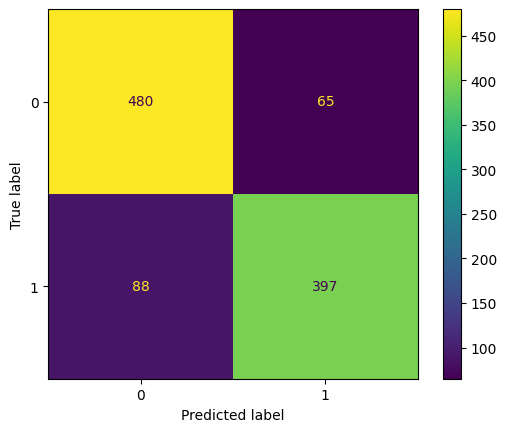

Keras NN:
Accuracy: 0.8496453229925282
Precision: 0.8728266569849531
Recall: 0.8185567010309278
F1-score: 0.844821022422225
Epoch 1/100
232/232 [==============================] - 1s 6ms/step - loss: 0.3154 - accuracy: 0.8624 - val_loss: 0.6816 - val_accuracy: 0.7125
Epoch 2/100
232/232 [==============================] - 2s 8ms/step - loss: 0.2973 - accuracy: 0.8717 - val_loss: 0.7257 - val_accuracy: 0.6553
Epoch 3/100
232/232 [==============================] - 2s 10ms/step - loss: 0.2869 - accuracy: 0.8725 - val_loss: 1.1113 - val_accuracy: 0.5825
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2826 - accuracy: 0.8809 - val_loss: 0.8474 - val_accuracy: 0.6456
Epoch 5/100
232/232 [==============================] - 2s 7ms/step - loss: 0.2728 - accuracy: 0.8810 - val_loss: 0.9130 - val_accuracy: 0.6041
Epoch 6/100
232/232 [==============================] - 2s 8ms/step - loss: 0.2691 - accuracy: 0.8820 - val_loss: 0.8139 - val_accuracy: 0.6413
Epoch 7/100
232/2

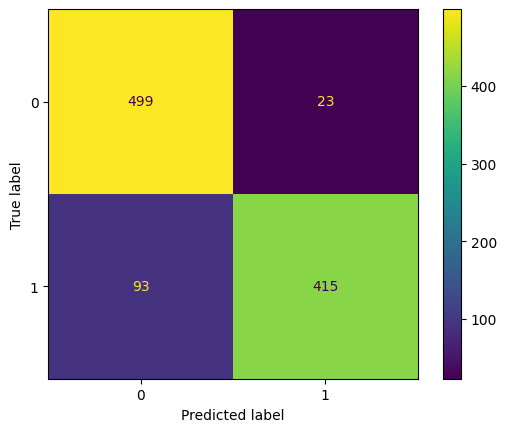

Keras NN:
Accuracy: 0.8864339155881377
Precision: 0.9488248640030834
Recall: 0.8169291338582677
F1-score: 0.8779509209913068
Epoch 1/100
232/232 [==============================] - 5s 21ms/step - loss: 0.2293 - accuracy: 0.9041 - val_loss: 0.8096 - val_accuracy: 0.7104
Epoch 2/100
232/232 [==============================] - 3s 13ms/step - loss: 0.2290 - accuracy: 0.9026 - val_loss: 1.0478 - val_accuracy: 0.6138
Epoch 3/100
232/232 [==============================] - 3s 11ms/step - loss: 0.2176 - accuracy: 0.9076 - val_loss: 0.9033 - val_accuracy: 0.6758
Epoch 4/100
232/232 [==============================] - 2s 8ms/step - loss: 0.2137 - accuracy: 0.9100 - val_loss: 1.1171 - val_accuracy: 0.6230
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2109 - accuracy: 0.9130 - val_loss: 0.8573 - val_accuracy: 0.7233
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2043 - accuracy: 0.9119 - val_loss: 1.0562 - val_accuracy: 0.6683
Epoch 7/100
23

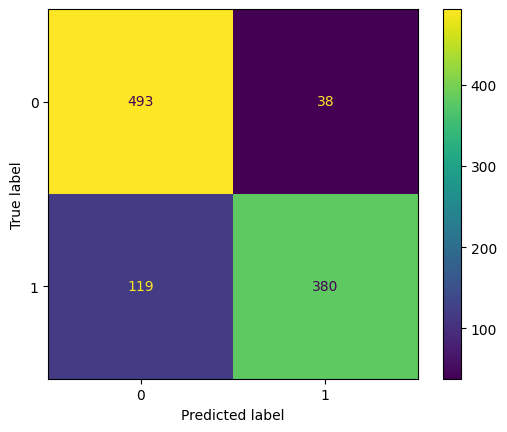

Keras NN:
Accuracy: 0.8449799787899717
Precision: 0.9140988121879842
Recall: 0.7615230460921844
F1-score: 0.8308644440830041
Epoch 1/100
232/232 [==============================] - 1s 6ms/step - loss: 0.2224 - accuracy: 0.9058 - val_loss: 1.1387 - val_accuracy: 0.6208
Epoch 2/100
232/232 [==============================] - 1s 5ms/step - loss: 0.2196 - accuracy: 0.9067 - val_loss: 1.2066 - val_accuracy: 0.6294
Epoch 3/100
232/232 [==============================] - 1s 5ms/step - loss: 0.2130 - accuracy: 0.9075 - val_loss: 0.9051 - val_accuracy: 0.7044
Epoch 4/100
232/232 [==============================] - 2s 8ms/step - loss: 0.2124 - accuracy: 0.9100 - val_loss: 1.2190 - val_accuracy: 0.6197
Epoch 5/100
232/232 [==============================] - 4s 17ms/step - loss: 0.2063 - accuracy: 0.9137 - val_loss: 0.8424 - val_accuracy: 0.7389
Epoch 6/100
232/232 [==============================] - 4s 19ms/step - loss: 0.2081 - accuracy: 0.9127 - val_loss: 1.1768 - val_accuracy: 0.6327
Epoch 7/100
232

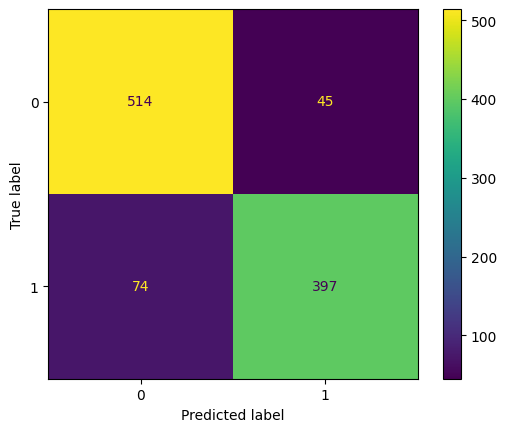

Keras NN:
Accuracy: 0.8811932895031696
Precision: 0.9128201120443571
Recall: 0.8428874734607219
F1-score: 0.8764610283823091
Epoch 1/100
232/232 [==============================] - 3s 14ms/step - loss: 0.2124 - accuracy: 0.9137 - val_loss: 0.7920 - val_accuracy: 0.7184
Epoch 2/100
232/232 [==============================] - 3s 11ms/step - loss: 0.2073 - accuracy: 0.9120 - val_loss: 0.8094 - val_accuracy: 0.6931
Epoch 3/100
232/232 [==============================] - 3s 11ms/step - loss: 0.1963 - accuracy: 0.9192 - val_loss: 0.8988 - val_accuracy: 0.6823
Epoch 4/100
232/232 [==============================] - 3s 11ms/step - loss: 0.1984 - accuracy: 0.9147 - val_loss: 1.0224 - val_accuracy: 0.6796
Epoch 5/100
232/232 [==============================] - 2s 7ms/step - loss: 0.2029 - accuracy: 0.9145 - val_loss: 1.0261 - val_accuracy: 0.6499
Epoch 6/100
232/232 [==============================] - 2s 10ms/step - loss: 0.1906 - accuracy: 0.9214 - val_loss: 1.0542 - val_accuracy: 0.6516
Epoch 7/100


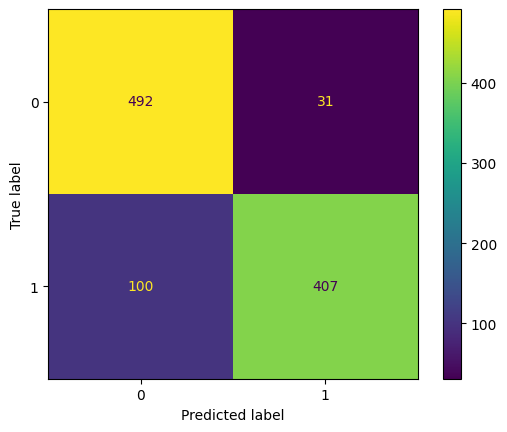

Keras NN:
Accuracy: 0.8717439593303691
Precision: 0.9312401018470718
Recall: 0.8027613412228797
F1-score: 0.862240981571235
Epoch 1/100
232/232 [==============================] - 2s 10ms/step - loss: 0.1996 - accuracy: 0.9151 - val_loss: 0.9454 - val_accuracy: 0.6980
Epoch 2/100
232/232 [==============================] - 2s 10ms/step - loss: 0.1923 - accuracy: 0.9178 - val_loss: 1.0099 - val_accuracy: 0.7028
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1956 - accuracy: 0.9204 - val_loss: 1.1507 - val_accuracy: 0.6300
Epoch 4/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1946 - accuracy: 0.9191 - val_loss: 1.3414 - val_accuracy: 0.5442
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1867 - accuracy: 0.9204 - val_loss: 1.0827 - val_accuracy: 0.6629
Epoch 6/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1856 - accuracy: 0.9222 - val_loss: 1.1269 - val_accuracy: 0.6375
Epoch 7/100
232/

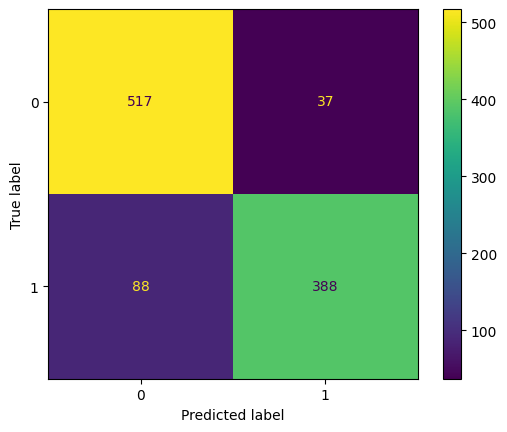

Keras NN:
Accuracy: 0.87416952340503
Precision: 0.9242703083882285
Recall: 0.8151260504201681
F1-score: 0.8662738681518857
Epoch 1/100
232/232 [==============================] - 3s 12ms/step - loss: 0.2005 - accuracy: 0.9134 - val_loss: 0.9039 - val_accuracy: 0.6963
Epoch 2/100
232/232 [==============================] - 3s 12ms/step - loss: 0.2075 - accuracy: 0.9141 - val_loss: 1.1683 - val_accuracy: 0.5858
Epoch 3/100
232/232 [==============================] - 2s 11ms/step - loss: 0.2009 - accuracy: 0.9110 - val_loss: 1.1285 - val_accuracy: 0.6052
Epoch 4/100
232/232 [==============================] - 3s 14ms/step - loss: 0.1938 - accuracy: 0.9138 - val_loss: 1.4899 - val_accuracy: 0.5615
Epoch 5/100
232/232 [==============================] - 5s 20ms/step - loss: 0.1941 - accuracy: 0.9183 - val_loss: 0.9626 - val_accuracy: 0.6710
Epoch 6/100
232/232 [==============================] - 3s 11ms/step - loss: 0.1878 - accuracy: 0.9220 - val_loss: 1.1137 - val_accuracy: 0.6375
Epoch 7/100
2

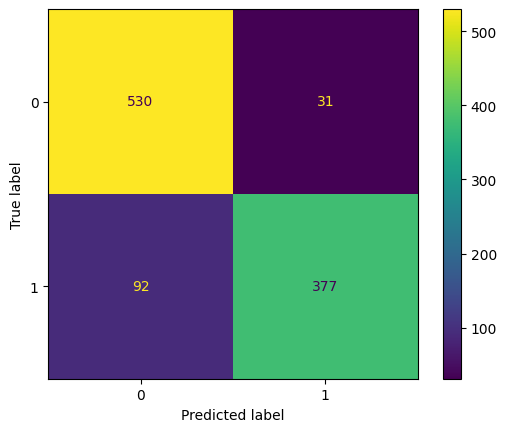

Keras NN:
Accuracy: 0.8742897430342558
Precision: 0.9356783875134934
Recall: 0.8038379530916845
F1-score: 0.8647619826431835
Epoch 1/100
232/232 [==============================] - 2s 8ms/step - loss: 0.1947 - accuracy: 0.9204 - val_loss: 1.0952 - val_accuracy: 0.6586
Epoch 2/100
232/232 [==============================] - 3s 12ms/step - loss: 0.1912 - accuracy: 0.9187 - val_loss: 0.9499 - val_accuracy: 0.7001
Epoch 3/100
232/232 [==============================] - 3s 14ms/step - loss: 0.1922 - accuracy: 0.9175 - val_loss: 0.8761 - val_accuracy: 0.7125
Epoch 4/100
232/232 [==============================] - 5s 20ms/step - loss: 0.1857 - accuracy: 0.9199 - val_loss: 1.1351 - val_accuracy: 0.6435
Epoch 5/100
232/232 [==============================] - 3s 13ms/step - loss: 0.1852 - accuracy: 0.9219 - val_loss: 0.9675 - val_accuracy: 0.6888
Epoch 6/100
232/232 [==============================] - 3s 13ms/step - loss: 0.1816 - accuracy: 0.9243 - val_loss: 1.2433 - val_accuracy: 0.6246
Epoch 7/100


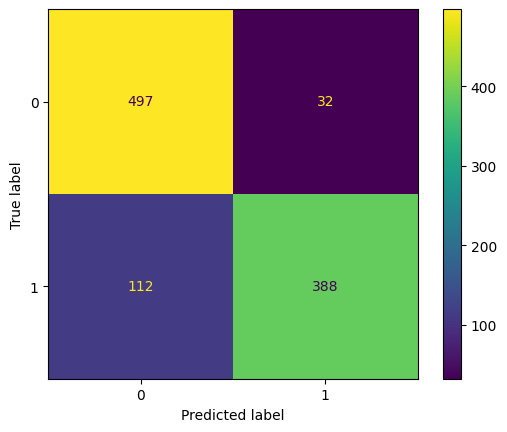

Keras NN:
Accuracy: 0.8577542533081286
Precision: 0.9276842695207275
Recall: 0.776
F1-score: 0.845089675389911
Epoch 1/100
232/232 [==============================] - 3s 14ms/step - loss: 0.1902 - accuracy: 0.9218 - val_loss: 0.8130 - val_accuracy: 0.7492
Epoch 2/100
232/232 [==============================] - 3s 13ms/step - loss: 0.1882 - accuracy: 0.9156 - val_loss: 0.8884 - val_accuracy: 0.7298
Epoch 3/100
232/232 [==============================] - 3s 11ms/step - loss: 0.1854 - accuracy: 0.9203 - val_loss: 0.9872 - val_accuracy: 0.6904
Epoch 4/100
232/232 [==============================] - 3s 12ms/step - loss: 0.1873 - accuracy: 0.9185 - val_loss: 1.1975 - val_accuracy: 0.6176
Epoch 5/100
232/232 [==============================] - 3s 12ms/step - loss: 0.1786 - accuracy: 0.9222 - val_loss: 0.8581 - val_accuracy: 0.7605
Epoch 6/100
232/232 [==============================] - 2s 10ms/step - loss: 0.1904 - accuracy: 0.9214 - val_loss: 1.1648 - val_accuracy: 0.6343
Epoch 7/100
232/232 [====

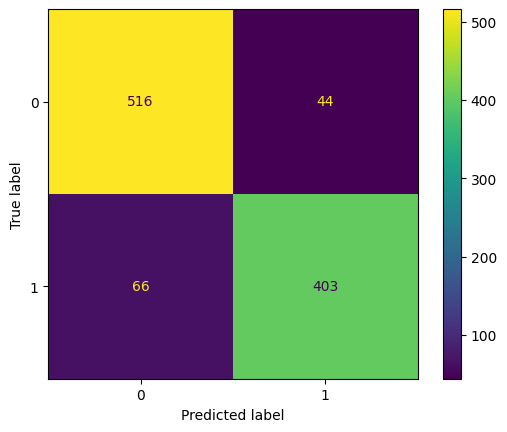

Keras NN:
Accuracy: 0.8903518123667378
Precision: 0.9162214391269752
Recall: 0.8592750533049041
F1-score: 0.8868350112779887
Epoch 1/100
232/232 [==============================] - 3s 12ms/step - loss: 0.1924 - accuracy: 0.9168 - val_loss: 1.2483 - val_accuracy: 0.6375
Epoch 2/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1832 - accuracy: 0.9220 - val_loss: 1.2877 - val_accuracy: 0.6241
Epoch 3/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1832 - accuracy: 0.9216 - val_loss: 1.2761 - val_accuracy: 0.6149
Epoch 4/100
232/232 [==============================] - 2s 7ms/step - loss: 0.1810 - accuracy: 0.9251 - val_loss: 0.9396 - val_accuracy: 0.7346
Epoch 5/100
232/232 [==============================] - 1s 6ms/step - loss: 0.1814 - accuracy: 0.9231 - val_loss: 1.3503 - val_accuracy: 0.6246
Epoch 6/100
232/232 [==============================] - 2s 7ms/step - loss: 0.1717 - accuracy: 0.9237 - val_loss: 1.3263 - val_accuracy: 0.6090
Epoch 7/100
232/

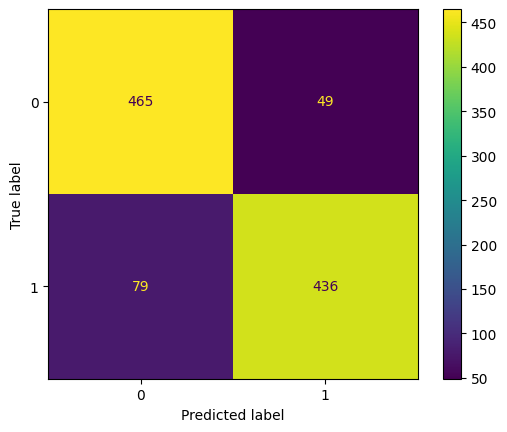

Keras NN:
Accuracy: 0.875635601223981
Precision: 0.898792407124437
Recall: 0.8466019417475729
F1-score: 0.8719168795192677

Keras NN:
Average Accuracy of Keras NN:  0.870619739954231
Average Precision of Keras NN:  0.9182457358741312
Average Recall of Keras NN:  0.814349869422931
Average F1 Score of Keras NN:  0.8627215814432316

Processing time of Keras NN K-Fold Cross Validation: 448.32075905799866 seconds


In [ ]:
##Keras NN Part 3(b)

#==============================================================
start_time = time.time()

kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)

total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1_score = 0

df_X_DR = pd.DataFrame(X_DR)

for train_index, test_index in kf.split(df_X_DR):
    X_train, X_test = df_X_DR.iloc[train_index], df_X_DR.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    final_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])
    predictions = final_model.predict(X_test);

    y_test_reshaped = np.reshape(y_test, (-1, 1))
    threshold = 0.5
    predictions_thresheld = (final_model.predict(X_test) > threshold).astype(int)

    confusion_matrix  = metrics.confusion_matrix(y_test_reshaped, predictions_thresheld)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()

    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / confusion_matrix.sum()
    precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
    recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Keras NN:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    total_accuracy = total_accuracy + accuracy
    total_precision = total_precision + precision
    total_recall = total_recall + recall
    total_f1_score = total_f1_score + f1_score

print("")
print("Keras NN:")
print("Average Accuracy of Keras NN: ", total_accuracy/10)
print("Average Precision of Keras NN: ", total_precision/10)
print("Average Recall of Keras NN: ", total_recall/10)
print("Average F1 Score of Keras NN: ", total_f1_score/10)


print("")
end_time = time.time()
print(f"Processing time of Keras NN K-Fold Cross Validation: {end_time - start_time} seconds")

In [ ]:
## KNN Part 1 (Au)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_DR, y, test_size=0.2, random_state=42)

start_time = time.time()

# Define the parameter grid
param_grid = {"n_neighbors": range(1, 31)}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up the GridSearchCV with the model and the parameter grid
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best parameters to initialize the final model
best_knn_model = grid_search.best_estimator_

print("")
end_time = time.time()
print(f"Processing time of KNN Param Search: {end_time - start_time} seconds")

Best parameters found:  {'n_neighbors': 9}
Best cross-validation accuracy:  0.8334334712716857

Processing time of KNN Param Search: 30.05231499671936 seconds


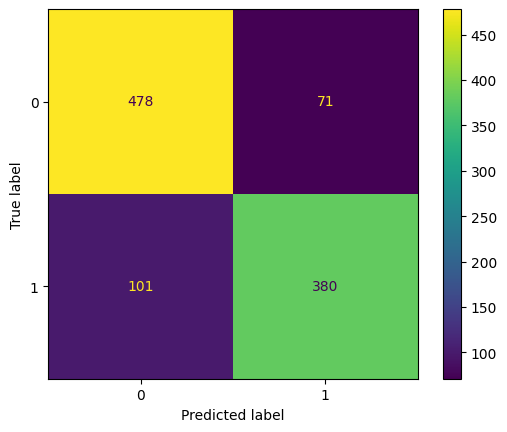

Accuracy: 0.8330097087378641


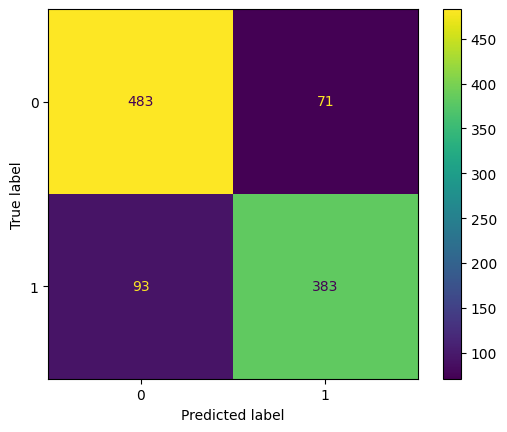

Accuracy: 0.8407766990291262


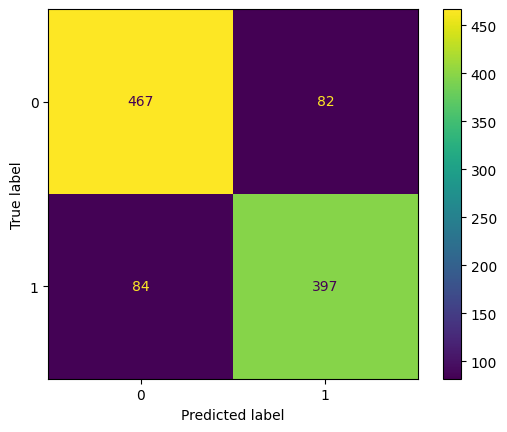

Accuracy: 0.8388349514563107


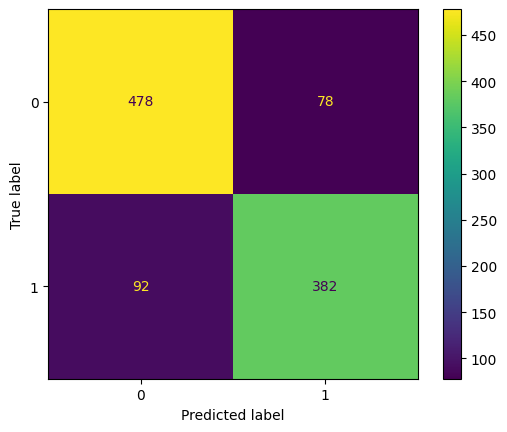

Accuracy: 0.8349514563106796


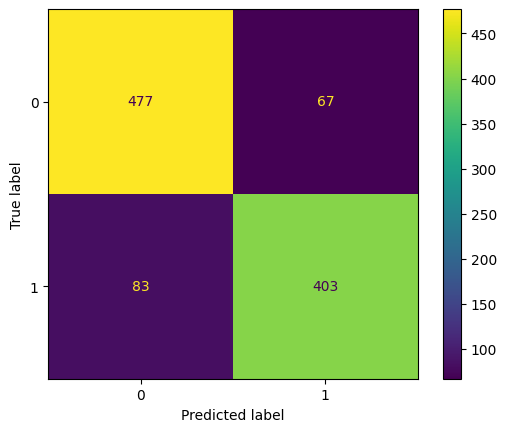

Accuracy: 0.8543689320388349


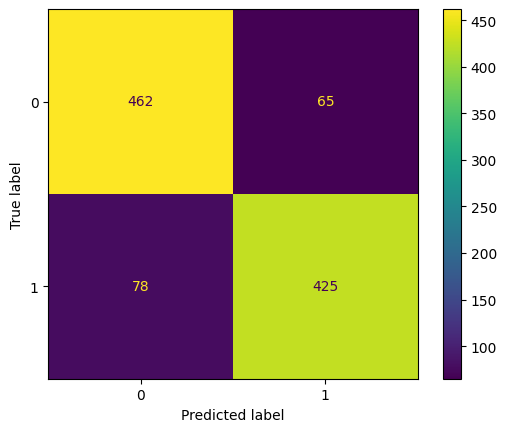

Accuracy: 0.8611650485436894


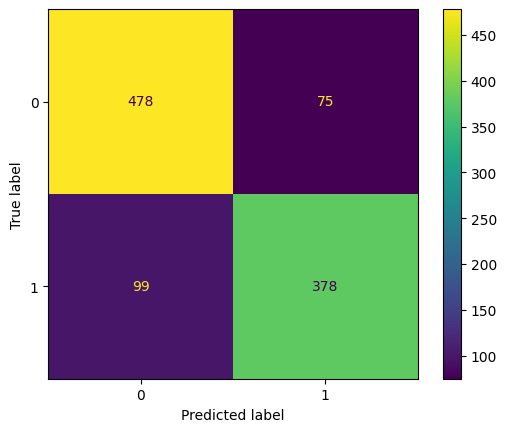

Accuracy: 0.8310679611650486


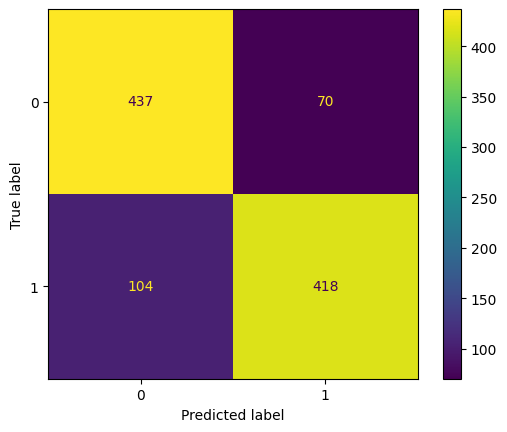

Accuracy: 0.8309037900874635


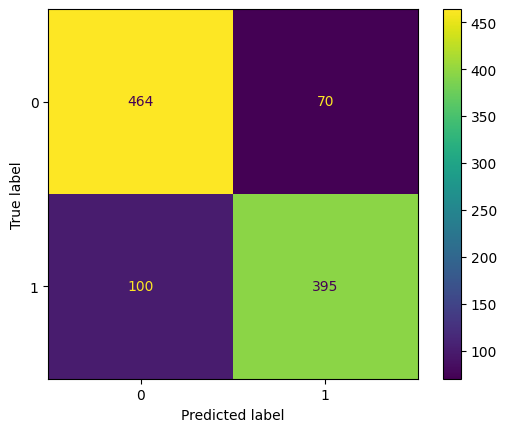

Accuracy: 0.8347910592808552


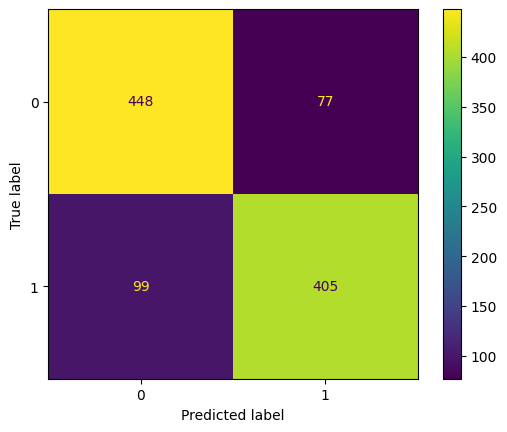

Accuracy: 0.8289601554907677

KNN: 
Average Accuracy: 0.8388829762140639
Average Precision: 0.8450928739046585
Average Recall: 0.8094832501875617
Average F1 Score: 0.8268308899986903

Processing time of KNN K-Fold Cross Validation: 3.923290252685547 seconds


In [ ]:
# Define model parameters and initialize the model
knn_params = {"n_neighbors": 9}
knn_model = KNeighborsClassifier(**knn_params)

start_time = time.time()

# Initialize KFold
kf = KFold(n_splits=10, random_state=42, shuffle=True)

df_X_DR = pd.DataFrame(X_DR)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over each fold
for train_index, test_index in kf.split(df_X_DR):
    X_train, X_test = df_X_DR.iloc[train_index], df_X_DR.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the model
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate and store metrics
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
    precisions.append(metrics.precision_score(y_test, y_pred))
    recalls.append(metrics.recall_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

    # Plot the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    cm_display.plot()
    plt.show()

    print(f"Accuracy: {accuracies[-1]}")

# Calculate and print average metrics
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

print("")
print("KNN: ")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1_score}")

# # Final evaluation on the whole dataset if needed
# knn_model.fit(X, y)
# y_pred_knn = knn_model.predict(X)

# print("KNN Model")
# print(metrics.confusion_matrix(y, y_pred_knn))
# print(metrics.classification_report(y, y_pred_knn))
# print(f'Accuracy: {metrics.accuracy_score(y, y_pred_knn)}')
# print(f"Precision: {metrics.precision_score(y, y_pred_knn)}")
# print(f"Recall: {metrics.recall_score(y, y_pred_knn)}")
# print(f"F1 Score: {metrics.f1_score(y, y_pred_knn)}")

# # Plot the confusion matrix for the whole dataset
# conf_matrix_knn = metrics.confusion_matrix(y, y_pred_knn)
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('KNN Confusion Matrix')
# plt.show()


print("")
end_time = time.time()
print(f"Processing time of KNN K-Fold Cross Validation: {end_time - start_time} seconds")

In [ ]:
#XGBoost Part 1 (AUTO TUNING)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_DR, y, test_size=0.2, random_state=42)

start_time = time.time()

# Define the classifier
clf = XGBClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 0.6, 0.8]
}

# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Fit the model with the best parameters
best_xgboost_model = XGBClassifier(**best_params)

print("")
end_time = time.time()
print(f"Processing time of XGBoost Param Search: {end_time - start_time} seconds")


Processing time of XGBoost Param Search: 417.82018280029297 seconds


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_DR, y, test_size=0.2, random_state=42)

In [ ]:
print("XGBoost best_params: ", best_params)
# XGBoost best_params:  {'learning_rate': 0.3, 'max_depth': 11, 'n_estimators': 200}


XGBoost best_params:  {'learning_rate': 0.3, 'max_depth': 11, 'n_estimators': 200}


In [ ]:
#XGBoost Part 2(a)
best_xgboost_model = XGBClassifier(learning_rate = 0.3, max_depth = 11, n_estimators = 200)

In [ ]:
print("XGBoost parameters: ", best_xgboost_model.get_params())

XGBoost parameters:  {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 11, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03419467 0.04383973 0.2150118  0.05502807 0.06548172 0.02670113
 0.03007521 0.02840838 0.02404472 0.05859258 0.0747854  0.0502639
 0.0298873  0.0521899  0.03467601 0.03737202 0.04334776 0.03065806
 0.03268144 0.03276017]


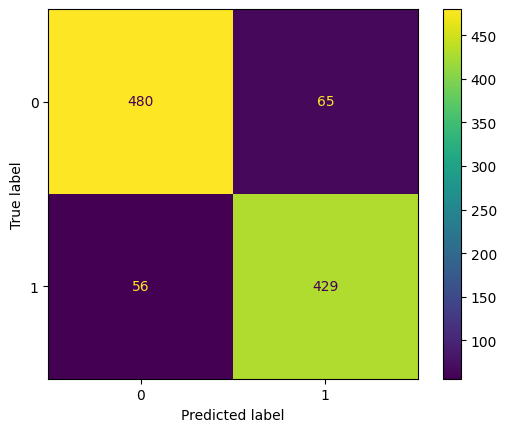

XGBoost:
Accuracy: 0.8826350137141776
Precision: 0.8811856932876041
Recall: 0.8845360824742268
F1-score: 0.8828577092635772


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03783035 0.04233342 0.21519199 0.06344938 0.07060347 0.03577396
 0.02530469 0.03679209 0.02730591 0.05001116 0.07126538 0.04350841
 0.03257033 0.04254097 0.03430709 0.0375413  0.04030638 0.02697147
 0.03147529 0.03491699]


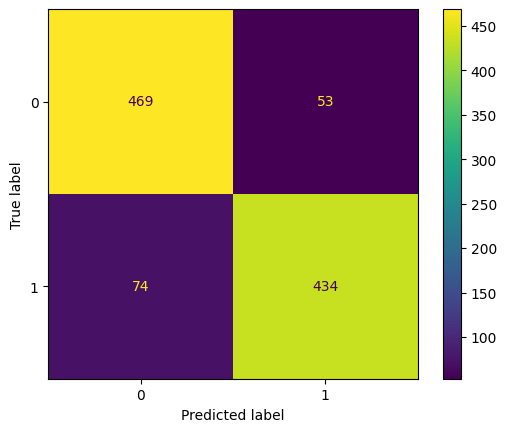

XGBoost:
Accuracy: 0.8763990708058045
Precision: 0.8937791945461432
Recall: 0.8543307086614174
F1-score: 0.8736098471410282


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.04061499 0.04197083 0.20811158 0.0581488  0.06626765 0.03469996
 0.02985526 0.02599475 0.02732363 0.06900913 0.073114   0.04552509
 0.02797273 0.04533539 0.03532941 0.03707219 0.03976969 0.02860778
 0.03075048 0.03452664]


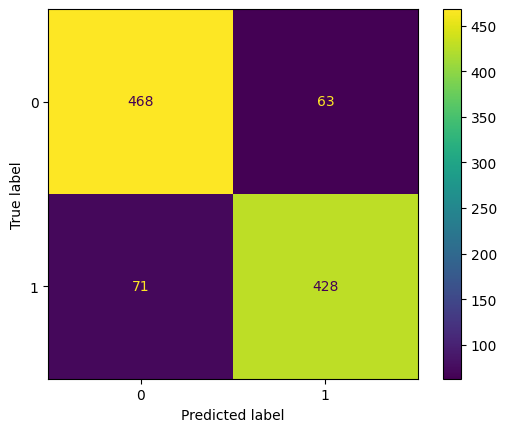

XGBoost:
Accuracy: 0.8695356815325566
Precision: 0.8784832144720821
Recall: 0.8577154308617234
F1-score: 0.8679751142886605


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03783891 0.04488315 0.20807141 0.06408451 0.06605851 0.03401453
 0.03690788 0.03037125 0.02654848 0.06497429 0.06653654 0.04538694
 0.03579655 0.03636425 0.03015446 0.03379472 0.04340687 0.03216505
 0.03082104 0.03182072]


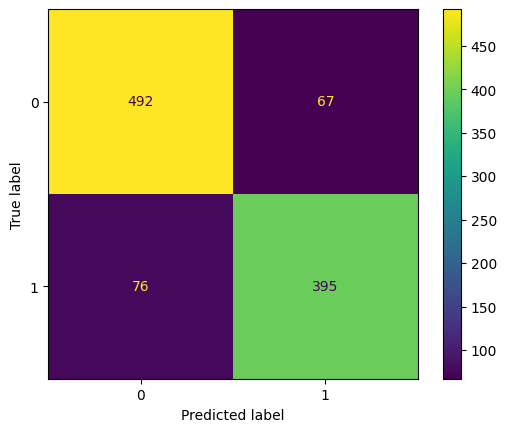

XGBoost:
Accuracy: 0.8593921508304563
Precision: 0.8749534398998264
Recall: 0.8386411889596603
F1-score: 0.8564125736205302


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03510258 0.043244   0.21673061 0.04279418 0.06567774 0.04040365
 0.05231468 0.02409595 0.03020985 0.06236526 0.06719395 0.04149324
 0.02709082 0.04141295 0.03930395 0.03449603 0.04614315 0.02800988
 0.03026951 0.03164792]


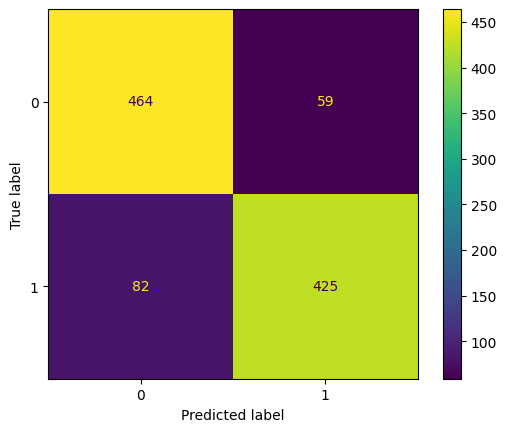

XGBoost:
Accuracy: 0.8627267961728912
Precision: 0.8813861087759925
Recall: 0.8382642998027613
F1-score: 0.8592845448623656


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03812347 0.04624384 0.21459694 0.05579678 0.06848715 0.03332996
 0.0340291  0.03157256 0.02603004 0.05849757 0.0696253  0.04999288
 0.03059798 0.03755147 0.03443264 0.0350348  0.04832689 0.02866067
 0.02527003 0.0337999 ]


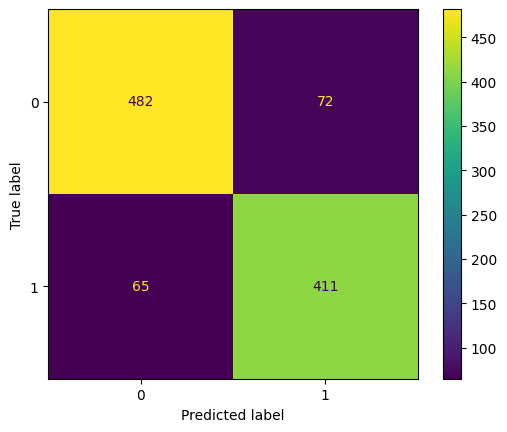

XGBoost:
Accuracy: 0.8667407396171465
Precision: 0.8691738622569342
Recall: 0.8634453781512605
F1-score: 0.866300150284399


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.04066806 0.0457738  0.21452333 0.05747829 0.0678311  0.03299828
 0.02603281 0.03322793 0.03015947 0.0549178  0.06697039 0.04608262
 0.03286668 0.04539754 0.0335348  0.03976494 0.04144932 0.03021529
 0.02694387 0.03316373]


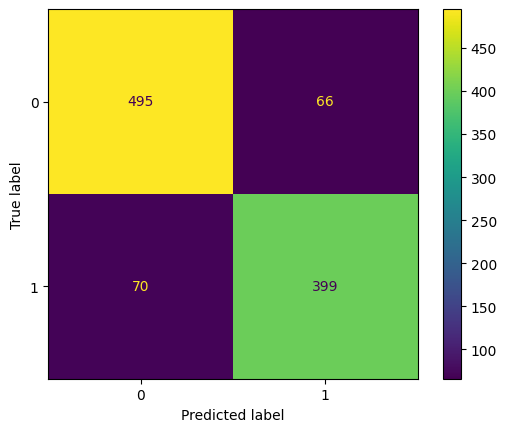

XGBoost:
Accuracy: 0.8665496049165935
Precision: 0.8785131459655485
Recall: 0.8507462686567164
F1-score: 0.8644067796610171


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03964539 0.04580047 0.22397006 0.0560379  0.07287884 0.0278491
 0.02362543 0.02715047 0.02563564 0.05456783 0.07227914 0.0407133
 0.03107749 0.05163843 0.03695503 0.03726228 0.0405549  0.0277249
 0.03112451 0.03350895]


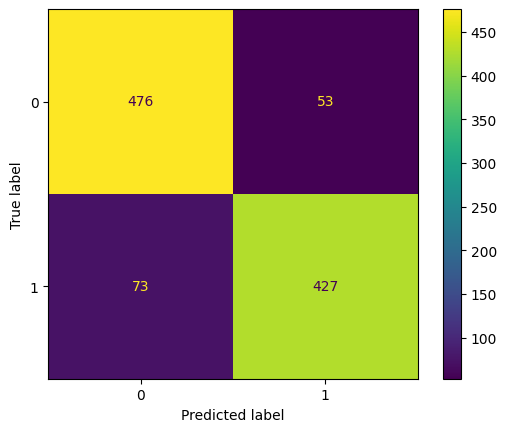

XGBoost:
Accuracy: 0.8769054820415879
Precision: 0.895000851879881
Recall: 0.854
F1-score: 0.8740198458838847


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03743333 0.03959566 0.23876674 0.05949074 0.06706731 0.02907984
 0.02910819 0.02491014 0.02259102 0.05689941 0.06771951 0.05409332
 0.03067341 0.03974967 0.03391362 0.0344281  0.04290347 0.02896305
 0.02796949 0.03464399]


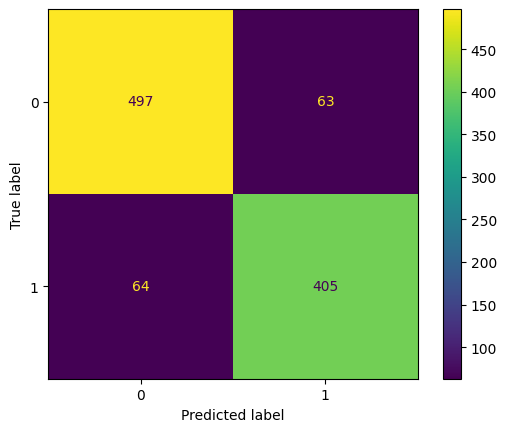

XGBoost:
Accuracy: 0.8755197228144989
Precision: 0.8847382649299582
Recall: 0.8635394456289979
F1-score: 0.8740103316653405


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost feature_importance: 
[0.03747157 0.04291695 0.2034052  0.06123624 0.07109593 0.02837887
 0.03126461 0.03231605 0.02350286 0.06286561 0.0734321  0.05447998
 0.02893954 0.04494316 0.03341864 0.03629698 0.04355182 0.02592732
 0.0291675  0.03538905]


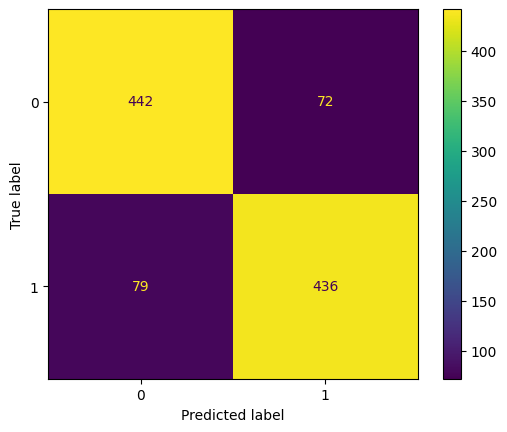

XGBoost:
Accuracy: 0.8532620603679499
Precision: 0.8580311198235726
Recall: 0.8466019417475729
F1-score: 0.8522782157621118

XGBoost:
Average Accuracy of XGBoost:  0.8689666322813663
Average Precision of XGBoost:  0.8795244895837543
Average Recall of XGBoost:  0.8551820744944336
Average F1 Score of XGBoost:  0.8671155112432916

Processing time of XGBoost K-Fold Cross Validation: 34.5799765586853 seconds


In [ ]:
#XGBoost Part 2(b)

start_time = time.time()

kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)

total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1_score = 0

df_X_DR = pd.DataFrame(X_DR)

for train_index, test_index in kf.split(df_X_DR):
    X_train, X_test = df_X_DR.iloc[train_index], df_X_DR.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    best_xgboost_model.fit(X_train, y_train, eval_metric='logloss')

    feature_importance = best_xgboost_model.feature_importances_
    print("XGBoost feature_importance: ")
    print(feature_importance)

    confusion_matrix  = metrics.confusion_matrix(y_test, best_xgboost_model.predict(X_test))

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()

    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / confusion_matrix.sum()
    precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
    recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("XGBoost:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    total_accuracy = total_accuracy + accuracy
    total_precision = total_precision + precision
    total_recall = total_recall + recall
    total_f1_score = total_f1_score + f1_score

print("")
print("XGBoost:")
print("Average Accuracy of XGBoost: ", total_accuracy/10)
print("Average Precision of XGBoost: ", total_precision/10)
print("Average Recall of XGBoost: ", total_recall/10)
print("Average F1 Score of XGBoost: ", total_f1_score/10)


print("")
end_time = time.time()
print(f"Processing time of XGBoost K-Fold Cross Validation: {end_time - start_time} seconds")

In [ ]:
#AdaBoost Part 1 (AUTO TUNING)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_DR, y, test_size=0.2, random_state=42)

start_time = time.time()

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_ada_clf = grid_search.best_estimator_

print("")
end_time = time.time()
print(f"Processing time of AdaBoost Param Search: {end_time - start_time} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Processing time of AdaBoost Param Search: 421.030237197876 seconds


In [ ]:
print("AdaBoost best_params: ", best_params)
# AdaBoost best_params:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}

AdaBoost best_params:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}


In [ ]:
#AdaBoost Part 2(a)
base_estimator = DecisionTreeClassifier(max_depth=1)
best_ada_clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42, algorithm = 'SAMME.R', learning_rate = 1.0, n_estimators = 200)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


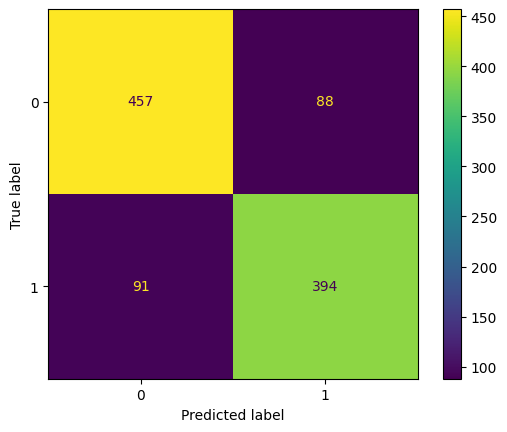

AdaBoost:
Accuracy: 0.8254516220561808
Precision: 0.8341944757390932
Recall: 0.8123711340206186
F1-score: 0.8231381831772834


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


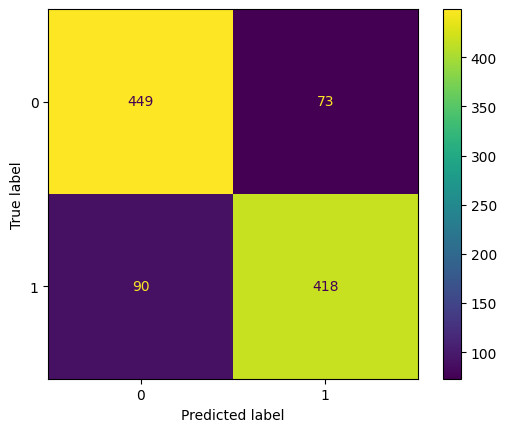

AdaBoost:
Accuracy: 0.8414939511871361
Precision: 0.8547320589157005
Recall: 0.8228346456692913
F1-score: 0.8384801020643435


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


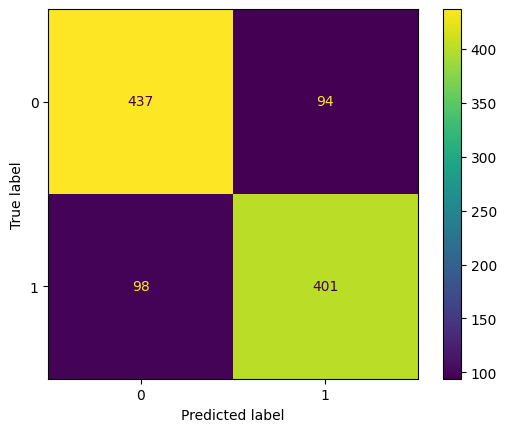

AdaBoost:
Accuracy: 0.8132913661598149
Precision: 0.8194791349961708
Recall: 0.8036072144288577
F1-score: 0.8114655701344878


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


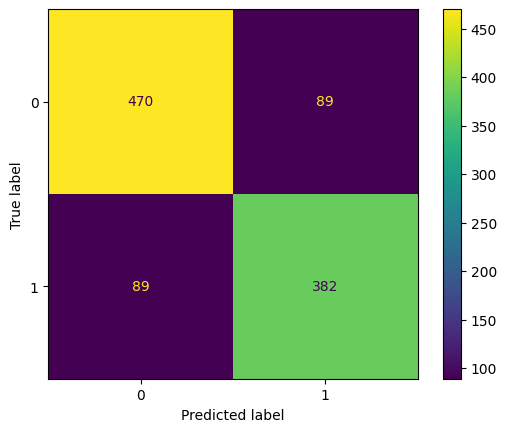

AdaBoost:
Accuracy: 0.8259137297798237
Precision: 0.8359058471680165
Recall: 0.8110403397027601
F1-score: 0.8232853843692288


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


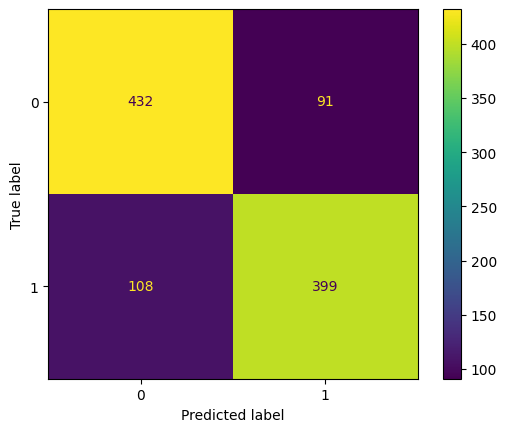

AdaBoost:
Accuracy: 0.8064930363062441
Precision: 0.8189385198615461
Recall: 0.7869822485207101
F1-score: 0.802642434732439


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


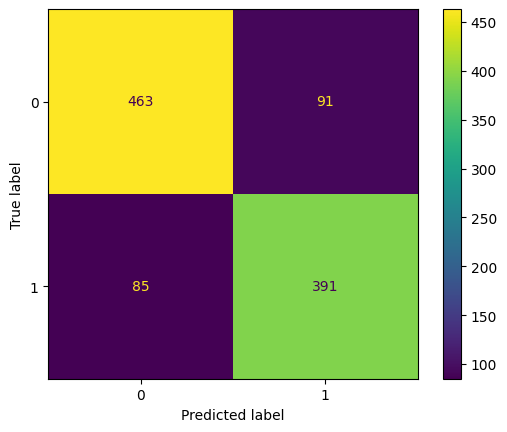

AdaBoost:
Accuracy: 0.8285843218153688
Precision: 0.8333551340745585
Recall: 0.8214285714285714
F1-score: 0.8273488734497759


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


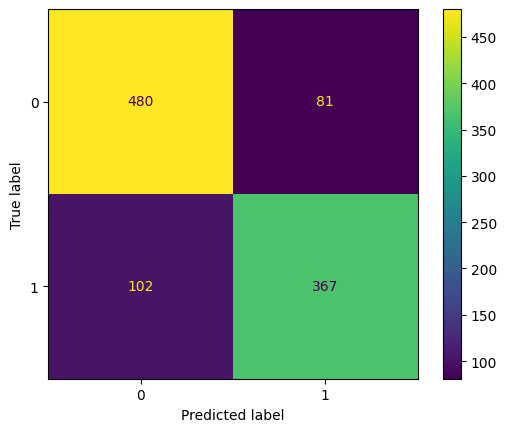

AdaBoost:
Accuracy: 0.8190654823666237
Precision: 0.8442282143384343
Recall: 0.7825159914712153
F1-score: 0.8122015444243912


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


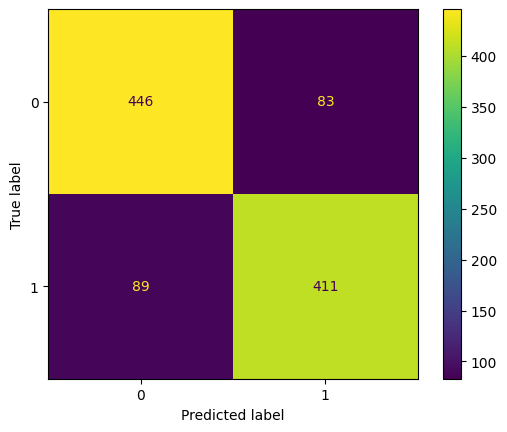

AdaBoost:
Accuracy: 0.8325500945179584
Precision: 0.8397182130318748
Recall: 0.822
F1-score: 0.8307646455325465


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


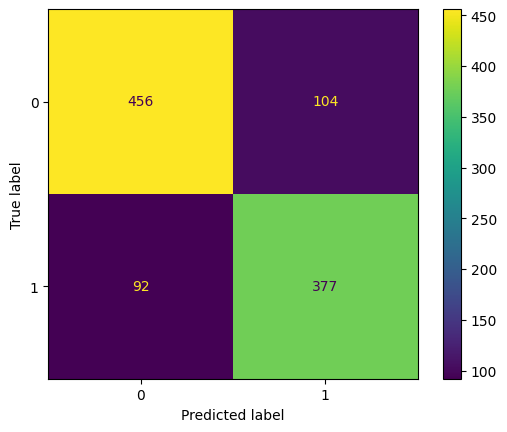

AdaBoost:
Accuracy: 0.8090618336886994
Precision: 0.8123249299719888
Recall: 0.8038379530916845
F1-score: 0.8080591576465546


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


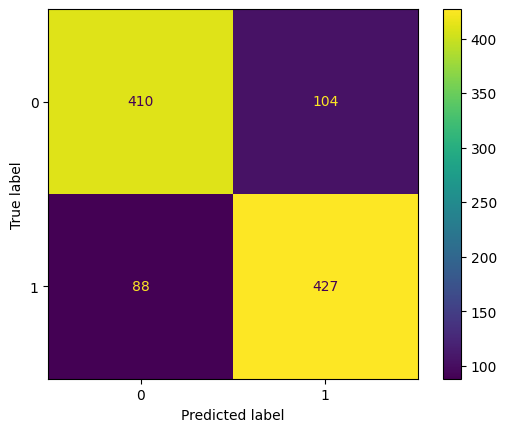

AdaBoost:
Accuracy: 0.8133957916210193
Precision: 0.8038368285733122
Recall: 0.829126213592233
F1-score: 0.8162856951583269

AdaBoost:
Average Accuracy of XGBoost:  0.8215301229498868
Average Precision of XGBoost:  0.8296713356670697
Average Recall of XGBoost:  0.8095744311925941
Average F1 Score of XGBoost:  0.8193671590689379

Processing time of AdaBoost K-Fold Cross Validation: 77.86562013626099 seconds


In [ ]:
#AdaBoost Part 2(b)

#==============================
start_time = time.time()

kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)

total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1_score = 0

df_X_DR = pd.DataFrame(X_DR)

for train_index, test_index in kf.split(df_X_DR):
    X_train, X_test = df_X_DR.iloc[train_index], df_X_DR.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    best_ada_clf.fit(X_train, y_train)
    confusion_matrix  = metrics.confusion_matrix(y_test, best_ada_clf.predict(X_test))

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.show()

    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / confusion_matrix.sum()
    precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
    recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("AdaBoost:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)

    total_accuracy = total_accuracy + accuracy
    total_precision = total_precision + precision
    total_recall = total_recall + recall
    total_f1_score = total_f1_score + f1_score

print("")
print("AdaBoost:")
print("Average Accuracy of XGBoost: ", total_accuracy/10)
print("Average Precision of XGBoost: ", total_precision/10)
print("Average Recall of XGBoost: ", total_recall/10)
print("Average F1 Score of XGBoost: ", total_f1_score/10)


print("")
end_time = time.time()
print(f"Processing time of AdaBoost K-Fold Cross Validation: {end_time - start_time} seconds")


# Deployment

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com #Run this and copy the IP address

34.73.250.129


In [ ]:
# Save the scaler and PCA objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca_optimal, f)

# Save the trained XGBoost model using pickle
with open('trained_model.sav', 'wb') as f:
    pickle.dump(best_xgboost_model, f)

In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
import pickle
import streamlit as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.express as px
import plotly.graph_objects as go

# Load the saved model and preprocessing objects
loaded_model = pickle.load(open("trained_model.sav", "rb"))
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)

# Function for prediction
def fraud_prediction(input_data):
    try:
        input_data_as_numpy_array = np.asarray(input_data)
        input_data_reshaped = input_data_as_numpy_array.reshape(len(input_data_as_numpy_array), -1)
        input_data_scaled = scaler.transform(input_data_reshaped)
        input_data_pca = pca.transform(input_data_scaled)
        prediction = loaded_model.predict(input_data_pca)
        result = ['Non-fraud' if pred == 0 else 'Fraud' for pred in prediction]
        return result
    except Exception as e:
        return str(e)

def main():
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Ethereum Fraud Detection ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    mode = st.radio("Select Mode", ("Batch Prediction", "Real-time Prediction"))

    if mode == "Batch Prediction":
        uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

        if uploaded_file is not None:
            input_df = pd.read_csv(uploaded_file)

            if input_df.isnull().values.any():
                st.warning("Error occured. Please check your file.")
                return

            input_data = input_df.iloc[:, 2:].values.tolist()  # Exclude the first two columns (address and flag)
            true_labels = input_df['flag'].values

            if st.button("Predict"):
                with st.spinner("Processing..."):
                    predictions = fraud_prediction(input_data)
                    predicted_labels = [0 if pred == 'Non-fraud' else 1 for pred in predictions]

                    accuracy = accuracy_score(true_labels, predicted_labels)
                    precision = precision_score(true_labels, predicted_labels)
                    recall = recall_score(true_labels, predicted_labels)
                    f1 = f1_score(true_labels, predicted_labels)

                st.success("Predictions Complete!")
                st.write(f"**Accuracy:** {accuracy * 100:.2f}%")
                st.write(f"**Precision:** {precision:.2f}")
                st.write(f"**Recall:** {recall:.2f}")
                st.write(f"**F1 Score:** {f1:.2f}")

                input_df['Prediction'] = predictions
                st.write(input_df)

                fig = px.histogram(input_df, x='Prediction', title='Fraud vs Non-Fraud Transactions')
                st.plotly_chart(fig)

                st.download_button(
                    label="Download Predictions Result",
                    data=input_df.to_csv().encode('utf-8'),
                    file_name='predictions.csv',
                    mime='text/csv'
                )

    elif mode == "Real-time Prediction":
        minTimeBetweenSentTnx = st.text_input("minTimeBetweenSentTnx", "Type Here")
        maxTimeBetweenSentTnx = st.text_input("maxTimeBetweenSentTnx", "Type Here")
        avgTimeBetweenSentTnx = st.text_input("avgTimeBetweenSentTnx", "Type Here")
        minTimeBetweenRecTnx = st.text_input("minTimeBetweenRecTnx", "Type Here")
        maxTimeBetweenRecTnx = st.text_input("maxTimeBetweenRecTnx", "Type Here")
        avgTimeBetweenRecTnx = st.text_input("avgTimeBetweenRecTnx", "Type Here")
        lifetime = st.text_input("lifetime", "Type Here")
        sentTransactions = st.text_input("sentTransactions", "Type Here")
        receivedTransactions = st.text_input("receivedTransactions", "Type Here")
        createdContracts = st.text_input("createdContracts", "Type Here")
        numUniqSentAddress = st.text_input("numUniqSentAddress", "Type Here")
        numUniqRecAddress = st.text_input("numUniqRecAddress", "Type Here")
        minValSent = st.text_input("minValSent", "Type Here")
        maxValSent = st.text_input("maxValSent", "Type Here")
        avgValSent = st.text_input("avgValSent", "Type Here")
        minValReceived = st.text_input("minValReceived", "Type Here")
        maxValReceived = st.text_input("maxValReceived", "Type Here")
        avgValReceived = st.text_input("avgValReceived", "Type Here")
        totalTransactions = st.text_input("totalTransactions", "Type Here")
        totalEtherSent = st.text_input("totalEtherSent", "Type Here")
        totalEtherReceived = st.text_input("totalEtherReceived", "Type Here")
        totalEtherSentContracts = st.text_input("totalEtherSentContracts", "Type Here")
        totalEtherBalance = st.text_input("totalEtherBalance", "Type Here")
        activityDays = st.text_input("activityDays", "Type Here")
        dailyMax = st.text_input("dailyMax", "Type Here")
        ratioRecSent = st.text_input("ratioRecSent", "Type Here")
        ratioSentTotal = st.text_input("ratioSentTotal", "Type Here")
        ratioRecTotal = st.text_input("ratioRecTotal", "Type Here")
        giniSent = st.text_input("giniSent", "Type Here")
        giniRec = st.text_input("giniRec", "Type Here")
        txFreq = st.text_input("txFreq", "Type Here")
        stdBalanceEth = st.text_input("stdBalanceEth", "Type Here")

        result = ""
        if st.button("Predict"):
            result = fraud_prediction([[minTimeBetweenSentTnx, maxTimeBetweenSentTnx, avgTimeBetweenSentTnx, minTimeBetweenRecTnx, maxTimeBetweenRecTnx, avgTimeBetweenRecTnx, lifetime, sentTransactions, receivedTransactions, createdContracts, numUniqSentAddress, numUniqRecAddress, minValSent, maxValSent, avgValSent, minValReceived, maxValReceived, avgValReceived, totalTransactions, totalEtherSent, totalEtherReceived, totalEtherSentContracts, totalEtherBalance, activityDays, dailyMax, ratioRecSent, ratioSentTotal, ratioRecTotal, giniSent, giniRec, txFreq, stdBalanceEth]])
            st.success(result)

if __name__ == '__main__':
    main()

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501 #then click the link inside, under your url is:xxxxx, then paste the ip address in the space

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
npx: installed 22 in 9.119s
your url is: https://few-buckets-shout.loca.lt
^C
